## Import Libraries..

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

## Read data from csv file..

In [2]:
my_data = pd.read_csv('Global Terrorism - START data.zip', encoding = 'latin-1')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
terrorism_data = pd.DataFrame(my_data)
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Check statistics of data..

In [4]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
terrorism_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
terrorism_data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
terrorism_data.shape

(181691, 135)

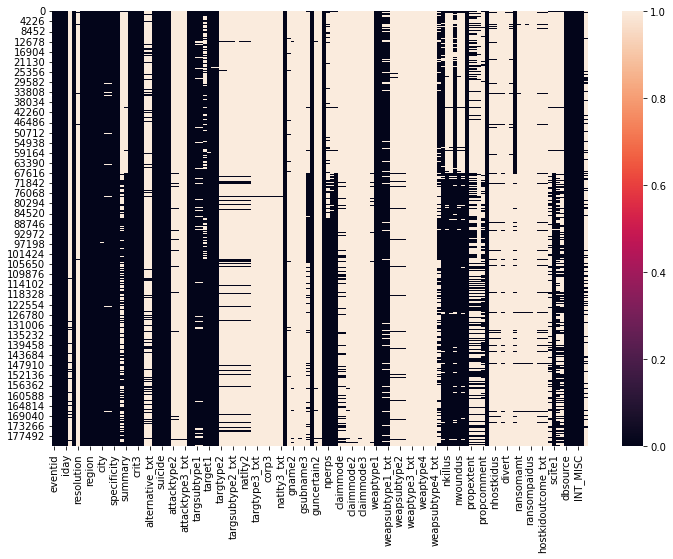

In [8]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(terrorism_data.isnull())
plt.show()

In [9]:
terrorism_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
terrorism_data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


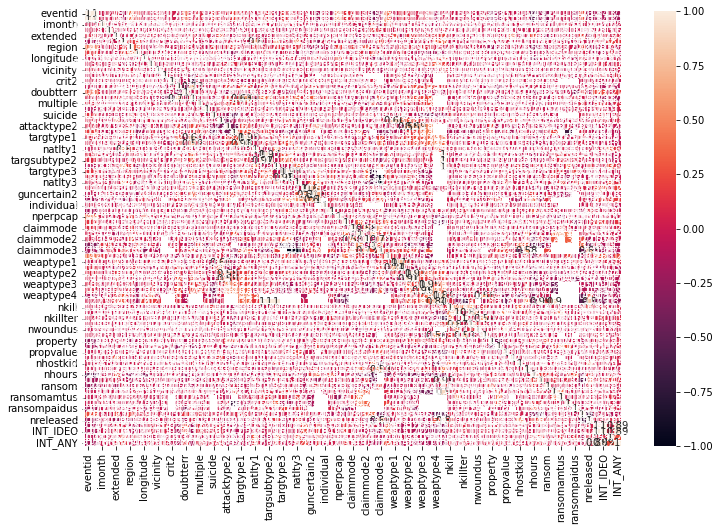

In [11]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(terrorism_data.corr(), annot = True)
plt.show()

## Exploratory Data Analysis (EDA)..

In [12]:
terrorism_data['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 864x576 with 0 Axes>

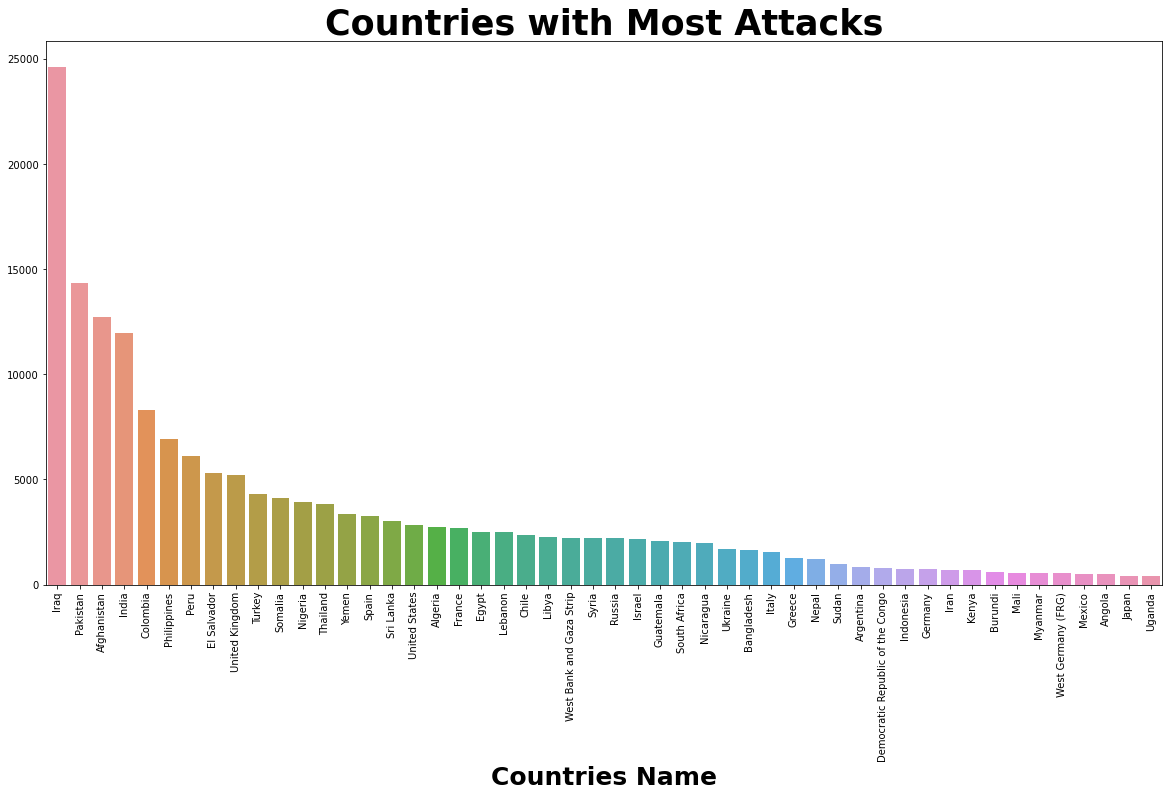

In [13]:
fig = plt.figure(figsize = (12, 8))
plt.subplots(figsize = (20, 10))
sns.barplot(terrorism_data['country_txt'].value_counts().index[:50], terrorism_data['country_txt'].value_counts()[:50].values)
plt.xticks(rotation = 90)
plt.xlabel('Countries Name', fontsize = 25, fontweight = 'bold')
plt.title('Countries with Most Attacks', fontsize = 35, fontweight = 'bold')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 864x576 with 0 Axes>

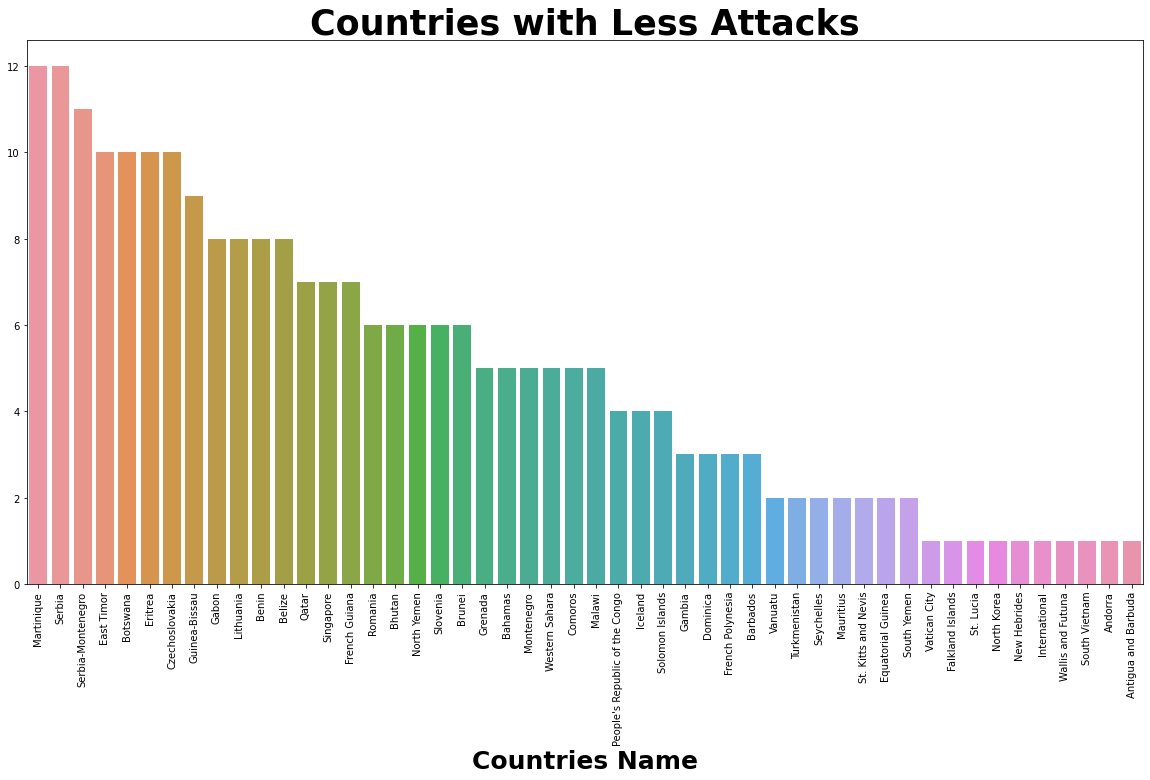

In [14]:
fig = plt.figure(figsize = (12, 8))
plt.subplots(figsize = (20, 10))
sns.barplot(terrorism_data['country_txt'].value_counts().index[-50:], terrorism_data['country_txt'].value_counts()[-50:].values)
plt.xticks(rotation = 90)
plt.xlabel('Countries Name', fontsize = 25, fontweight = 'bold')
plt.title('Countries with Less Attacks', fontsize = 35, fontweight = 'bold')
plt.show()

In [15]:
terrorism_data['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 864x576 with 0 Axes>

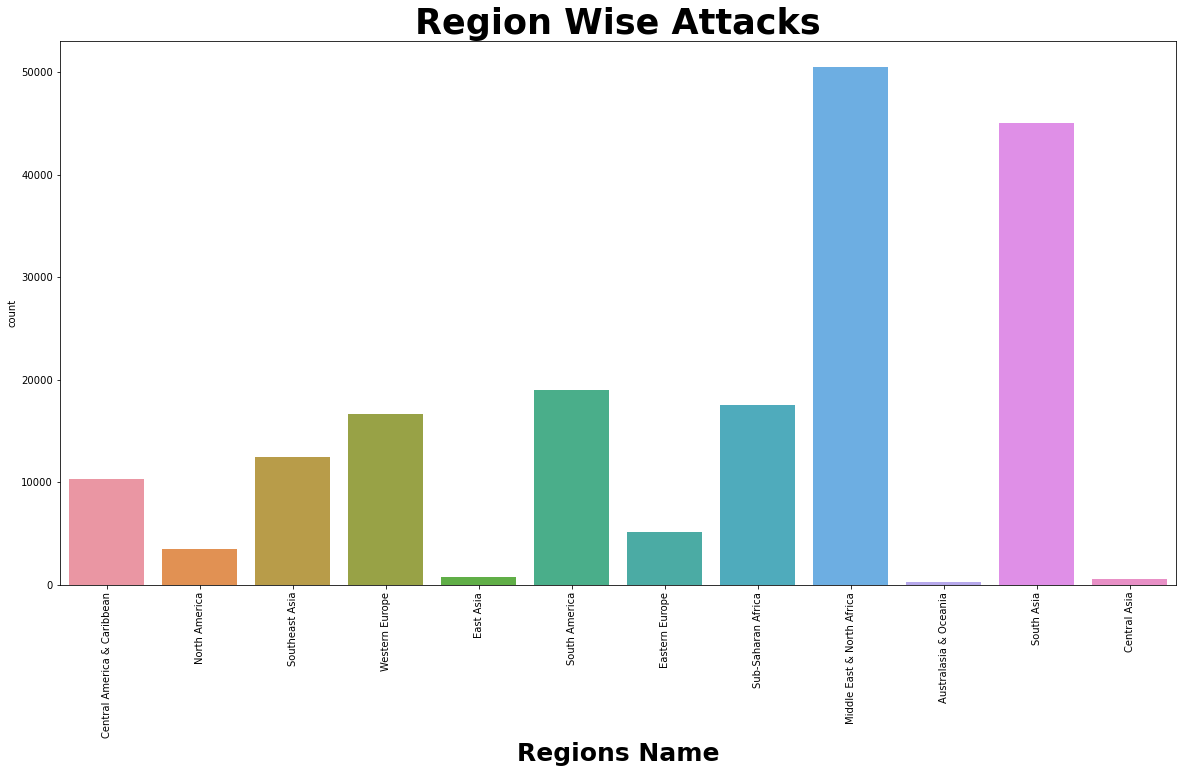

In [16]:
fig = plt.figure(figsize = (12, 8))
plt.subplots(figsize = (20, 10))
sns.countplot('region_txt', data = terrorism_data)
plt.xticks(rotation = 90)
plt.xlabel('Regions Name', fontsize = 25, fontweight = 'bold')
plt.title('Region Wise Attacks', fontsize = 35, fontweight = 'bold')
plt.show()

In [17]:
terrorism_data['city'].value_counts()

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36674, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 864x576 with 0 Axes>

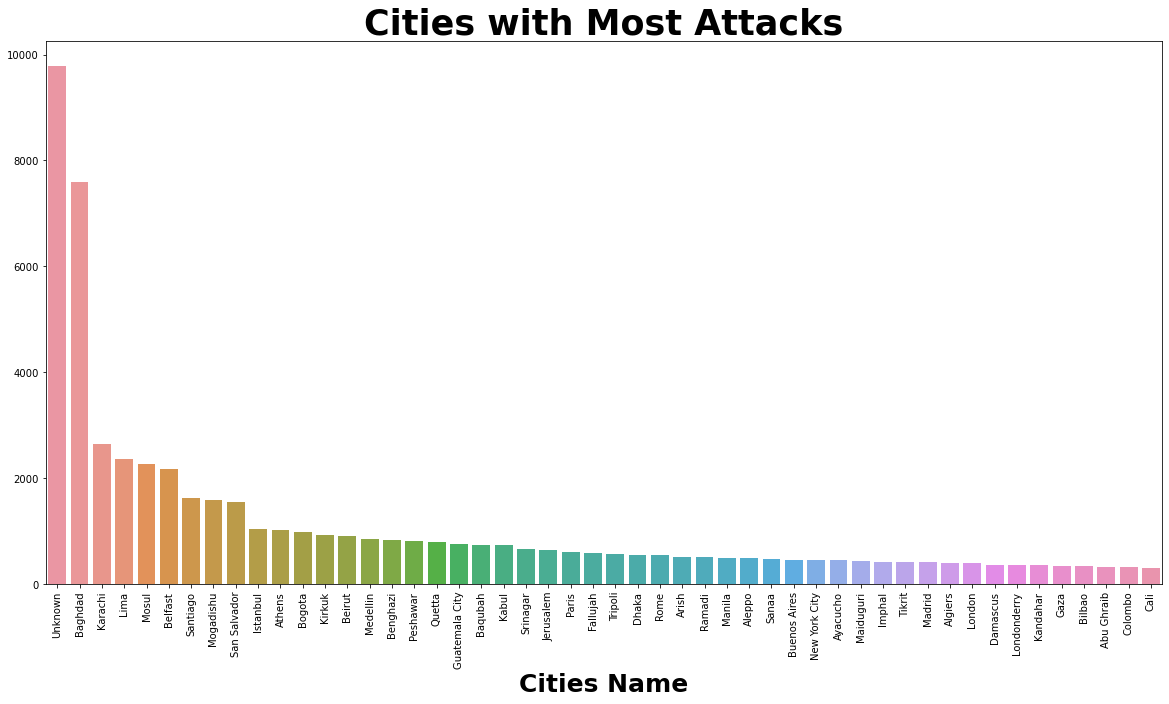

In [18]:
fig = plt.figure(figsize = (12, 8))
plt.subplots(figsize = (20, 10))
sns.barplot(terrorism_data['city'].value_counts().index[:50], terrorism_data['city'].value_counts()[:50].values)
plt.xticks(rotation = 90)
plt.xlabel('Cities Name', fontsize = 25, fontweight = 'bold')
plt.title('Cities with Most Attacks', fontsize = 35, fontweight = 'bold')
plt.show()

In [19]:
terrorism_data['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 864x576 with 0 Axes>

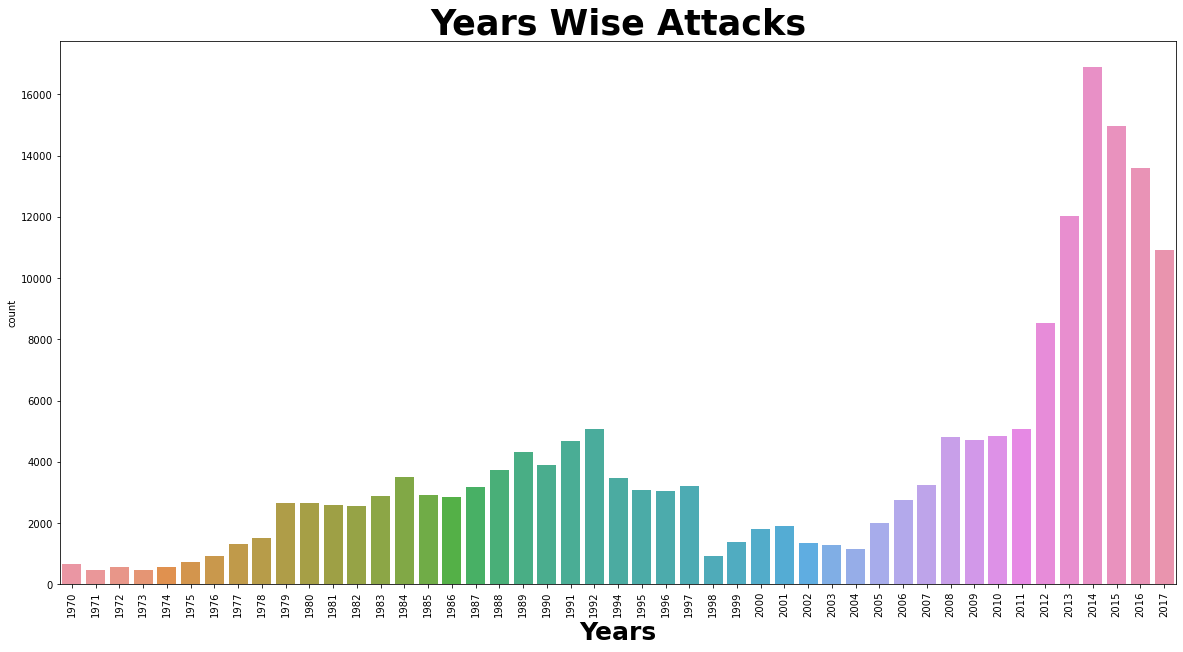

In [20]:
fig = plt.figure(figsize = (12, 8))
plt.subplots(figsize = (20, 10))
sns.countplot('iyear', data = terrorism_data)
plt.xticks(rotation = 90)
plt.xlabel('Years', fontsize = 25, fontweight = 'bold')
plt.title('Years Wise Attacks', fontsize = 35, fontweight = 'bold')
plt.show()

In [21]:
terrorism_data['imonth'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: imonth, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 864x576 with 0 Axes>

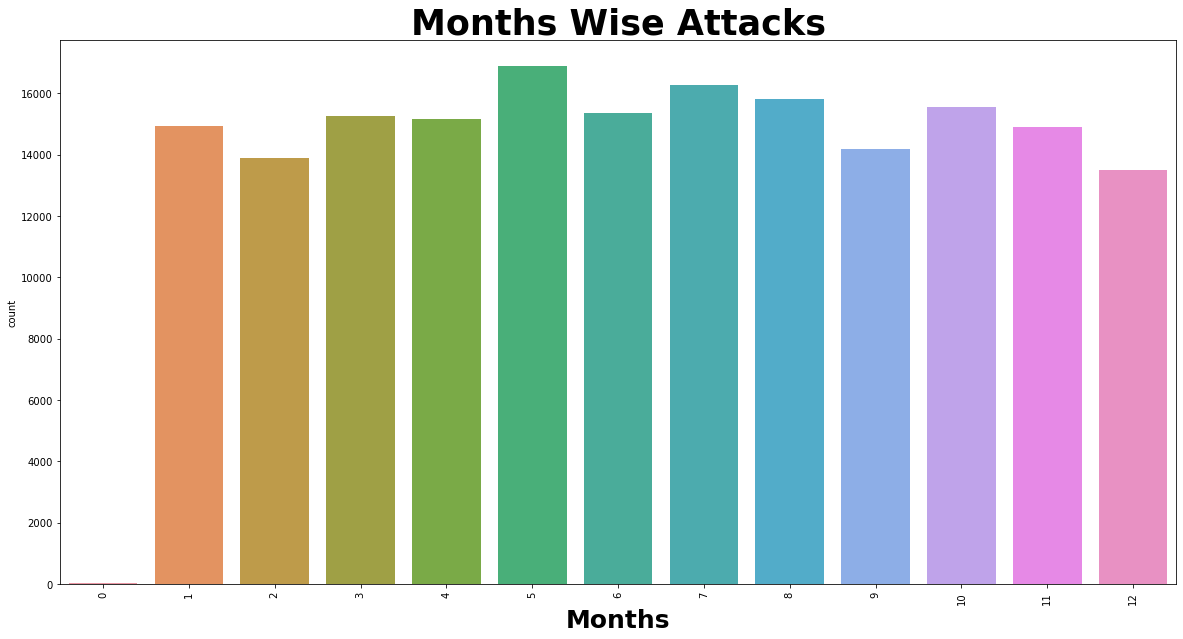

In [22]:
fig = plt.figure(figsize = (12, 8))
plt.subplots(figsize = (20, 10))
sns.countplot('imonth', data = terrorism_data)
plt.xticks(rotation = 90)
plt.xlabel('Months', fontsize = 25, fontweight = 'bold')
plt.title('Months Wise Attacks', fontsize = 35, fontweight = 'bold')
plt.show()

In [23]:
terrorism_data['iday'].value_counts()

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      891
Name: iday, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 864x576 with 0 Axes>

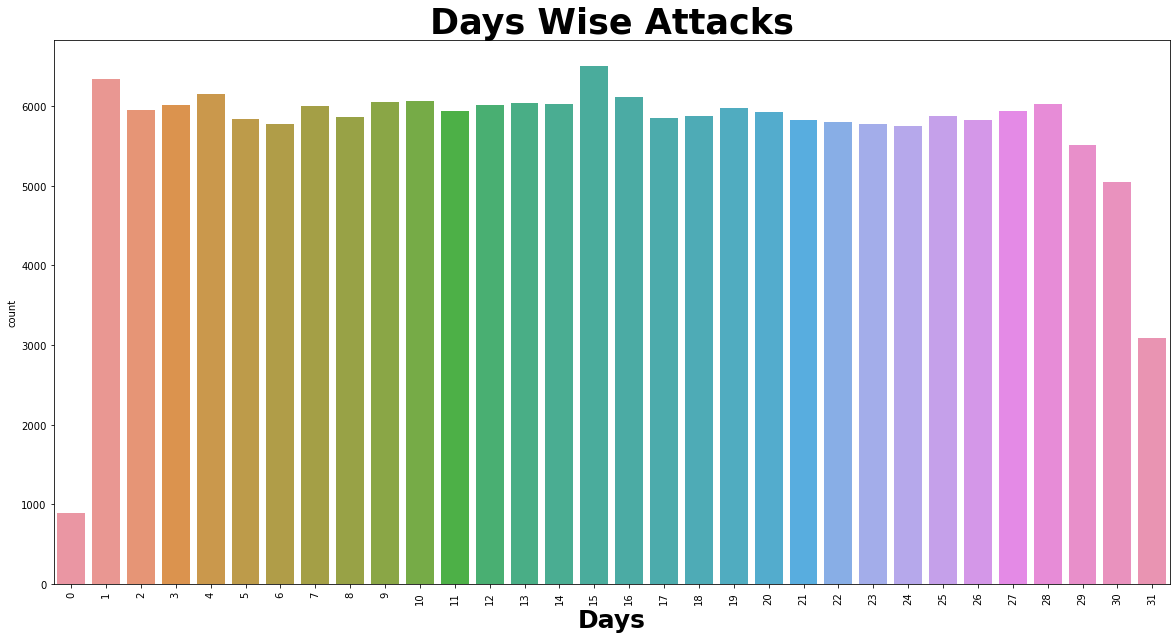

In [24]:
fig = plt.figure(figsize = (12, 8))
plt.subplots(figsize = (20, 10))
sns.countplot('iday', data = terrorism_data)
plt.xticks(rotation = 90)
plt.xlabel('Days', fontsize = 25, fontweight = 'bold')
plt.title('Days Wise Attacks', fontsize = 35, fontweight = 'bold')
plt.show()

In [25]:
terrorism_data['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 864x576 with 0 Axes>

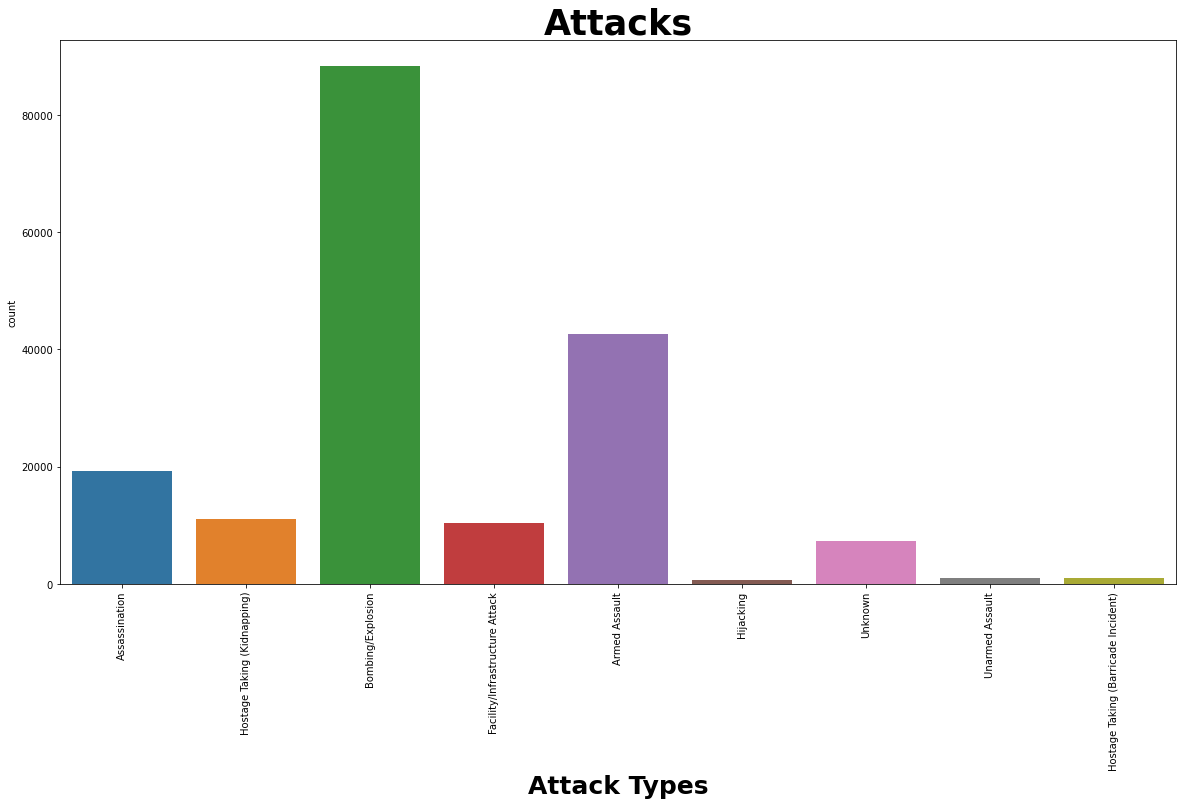

In [26]:
fig = plt.figure(figsize = (12, 8))
plt.subplots(figsize = (20, 10))
sns.countplot('attacktype1_txt', data = terrorism_data)
plt.xticks(rotation = 90)
plt.xlabel('Attack Types', fontsize = 25, fontweight = 'bold')
plt.title('Attacks', fontsize = 35, fontweight = 'bold')
plt.show()

In [27]:
terrorism_data['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 864x576 with 0 Axes>

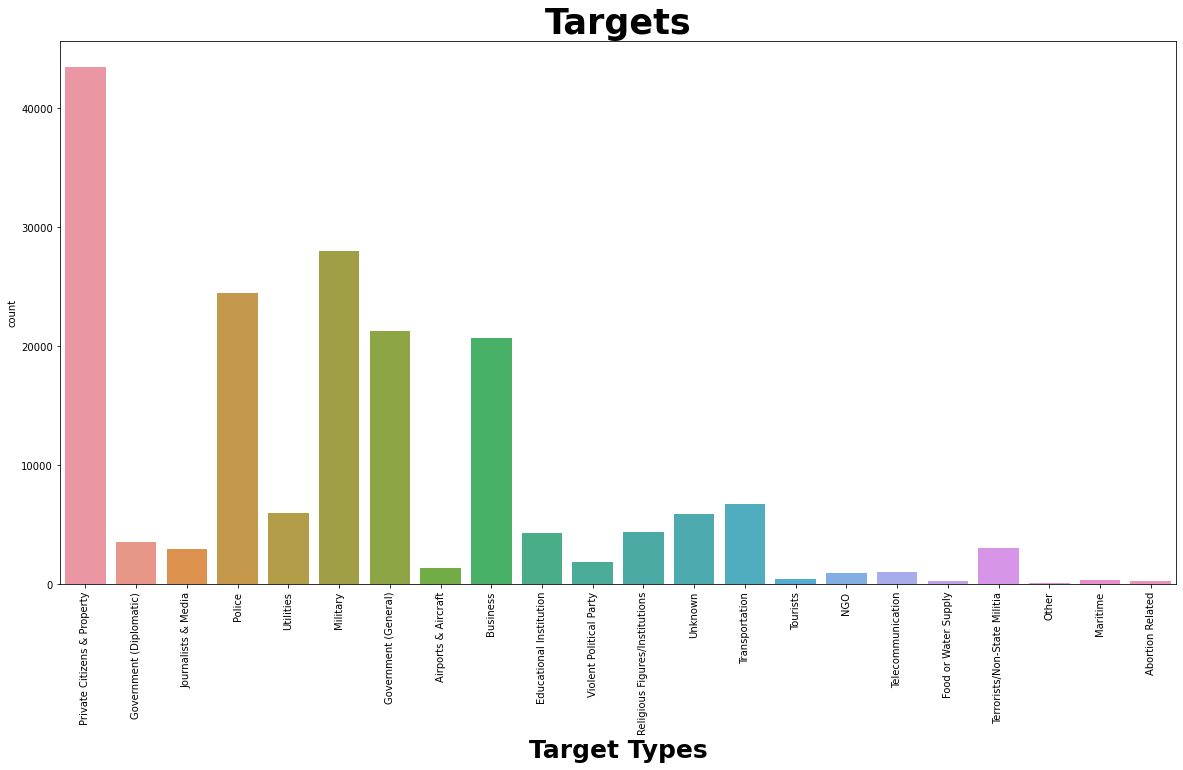

In [28]:
fig = plt.figure(figsize = (12, 8))
plt.subplots(figsize = (20, 10))
sns.countplot('targtype1_txt', data = terrorism_data)
plt.xticks(rotation = 90)
plt.xlabel('Target Types', fontsize = 25, fontweight = 'bold')
plt.title('Targets', fontsize = 35, fontweight = 'bold')
plt.show()

In [29]:
new_frame = terrorism_data.groupby('iyear')['country_txt'].sum().to_frame()
new_frame.head()

,country_txt
iyear,
1970,Dominican RepublicMexicoPhilippinesGreeceJapan...
1971,United StatesWest Germany (FRG)United StatesUn...
1972,PanamaPhilippinesKuwaitSpainArgentinaUnited Ki...
1973,ColombiaIrelandDominican RepublicUnited Kingdo...
1974,ItalyFranceItalyBoliviaUnited KingdomArgentina...


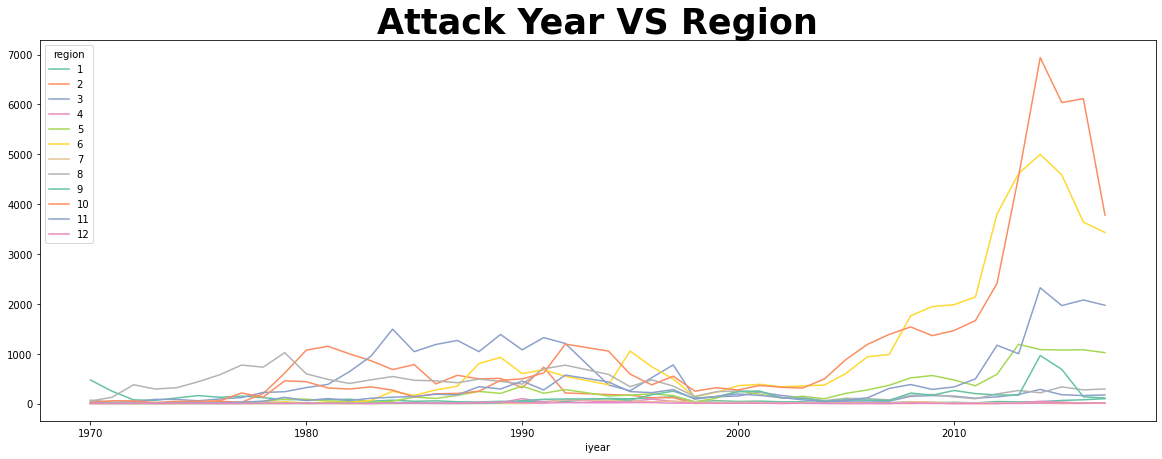

In [30]:
region = pd.crosstab(terrorism_data.iyear, terrorism_data.region)
region.plot(color = sns.color_palette('Set2', 12))
fig = plt.gcf()
plt.title("Attack Year VS Region", fontsize = 35, fontweight = 'bold')
fig.set_size_inches(20,7)
plt.show()

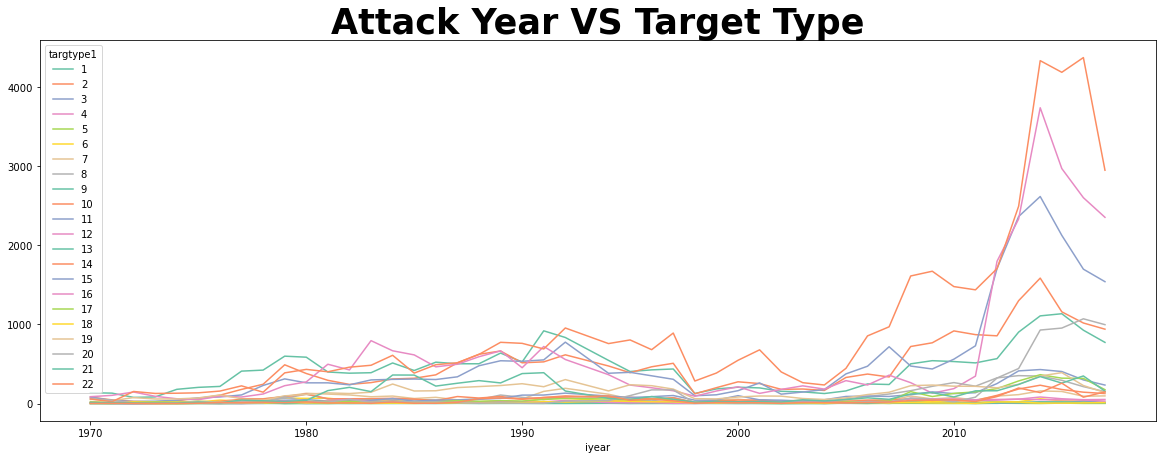

In [31]:
region = pd.crosstab(terrorism_data.iyear, terrorism_data.targtype1)
region.plot(color = sns.color_palette('Set2', 12))
fig = plt.gcf()
plt.title("Attack Year VS Target Type", fontsize = 35, fontweight = 'bold')
fig.set_size_inches(20,7)
plt.show()

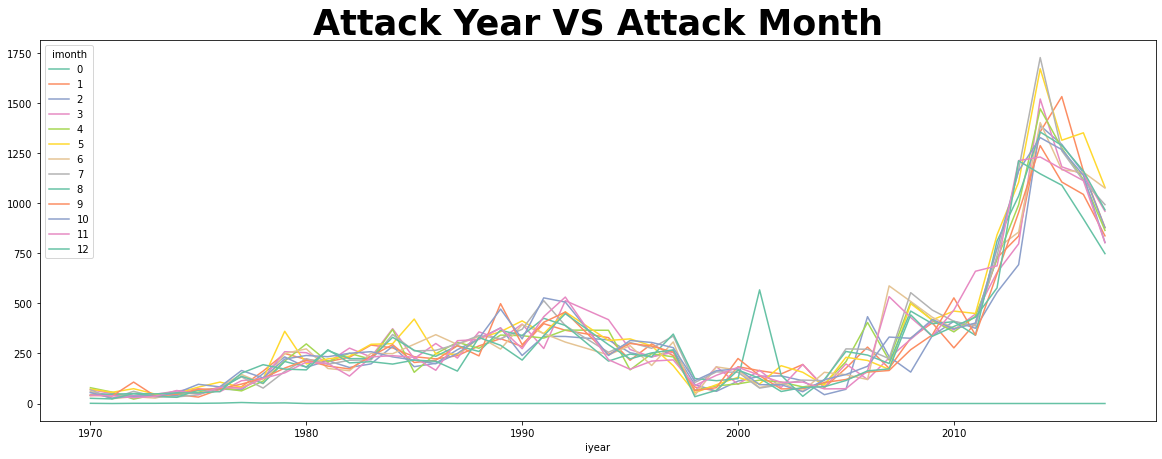

In [32]:
region = pd.crosstab(terrorism_data.iyear, terrorism_data.imonth)
region.plot(color = sns.color_palette('Set2', 12))
fig = plt.gcf()
plt.title("Attack Year VS Attack Month", fontsize = 35, fontweight = 'bold')
fig.set_size_inches(20,7)
plt.show()

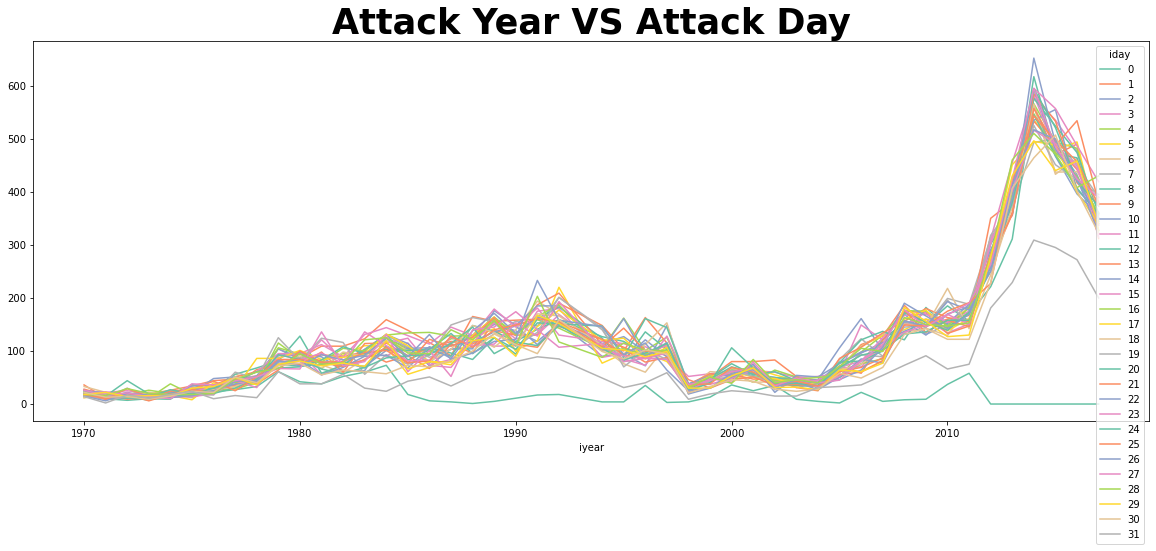

In [33]:
region = pd.crosstab(terrorism_data.iyear, terrorism_data.iday)
region.plot(color = sns.color_palette('Set2', 12))
fig = plt.gcf()
plt.title("Attack Year VS Attack Day", fontsize = 35, fontweight = 'bold')
fig.set_size_inches(20,7)
plt.show()

# THE END..